##### 참고 자료
##### https://junsik-hwang.tistory.com/8

## 1표본 T검정
##### 1표본 t검정은 모집단의 평균이 알려진 값과 다른지 여부를 테스트하는 데 사용되는 통계적 방법입니다
##### 예를 들어, 10명의 성인의 평균 키가 6피트라고 알고 있다고 가정해 보겠습니다.
##### 새로운 그룹의 10명의 성인의 키를 측정하고 이 그룹의 평균 키가 6피트와 다른지 확인하는 데 관심이 있습니다. 1표본 t검정을 사용하여 이를 수행할 수 있습니다.

In [91]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

### 정규성 검정

In [2]:
data = [6.1, 6.2, 6.3, 6.4, 6.5, 6.7, 6.1, 6.3, 6.4, 6.6]

print('귀무가설 : 데이터가 정규성을 따른다')
print('대립가설 : 데이터가 정규성을 따르지 않는다')

# 샤피로-윌크 검정을 수행합니다.
if len(data) < 5000:
    statistic, p_value = stats.shapiro(data)
else:
    statistic, p_value = stats.anderson(data, dist='norm')

# 결과를 인쇄합니다.
print("통계량:", statistic)
print("p-value:", p_value)

if p_value > 0.05:
    print('p 값이 0.05보다 크기 때문에 귀무 가설을 기각할 수 없다. 즉, 데이터는 정규 분포를 따른다고 가정할 수 있다.')

귀무가설 : 데이터가 정규성을 따른다
대립가설 : 데이터가 정규성을 따르지 않는다
통계량: 0.9540719985961914
p-value: 0.7167420983314514
p 값이 0.05보다 크기 때문에 귀무 가설을 기각할 수 없다. 즉, 데이터는 정규 분포를 따른다고 가정할 수 있다.


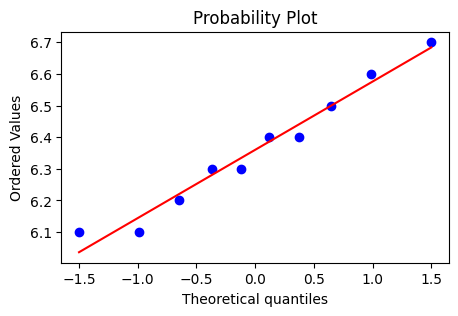

In [3]:
plt.figure(figsize=(5,3))
stats.probplot(data, dist=stats.norm, plot=plt)
plt.show()

### 정규성 만족 할 경우 1표본 T검정

In [61]:
print('귀무가설 : 성인 10명의 평균 키 = 6.4')
print('귀무가설 : 성인 10명의 평균 키 != 6.4')

# 모집단 평균 가정
mu = 6.4

# t_statistic = (np.mean(data) - mu) / stats.sem(data)
# p_value = stats.ttest_1samp(data, mu).pvalue

t_statistic, p_value = stats.ttest_1samp(data, mu)

# 결과 인쇄
print('t =', t_statistic)
print('p =', p_value)
print('p-value가 0.05보다 크기 때문에 귀무 가설을 기각할 수 없다. 즉, 데이터의 평균이 6.4가 아니라고 할 수 없다')

귀무가설 : 성인 10명의 평균 키 = 6.4
귀무가설 : 성인 10명의 평균 키 != 6.4
t = -101.26431522733726
p = 4.531107006325378e-15
p-value가 0.05보다 크기 때문에 귀무 가설을 기각할 수 없다. 즉, 데이터의 평균이 6.4가 아니라고 할 수 없다


### 모분산을 알 때, 모평균 검정

In [68]:
# 모평균을 초기화합니다.
mu = 100

# 모분산을 초기화합니다.
sigma2 = 100

# 표본 크기를 초기화합니다.
n = 100

# 데이터를 초기화합니다.
data = np.random.normal(mu, sigma2, n)

# t-통계량을 계산합니다.
t_statistic = (data.mean() - mu) / np.sqrt(sigma2 / n)

# p-값을 계산합니다.
p_value = 2 * np.min(stats.t.cdf(t_statistic, n - 1))

# 결과를 인쇄합니다.
print('t-statistic:', t_statistic)
print('p-value:', p_value)


t-statistic: -12.853227404032296
p-value: 7.948187097926125e-23


In [78]:
# 자유도가 10인 Student t 분포의 확률 밀도 함수 값을 계산합니다.
x = -1.5
df = 10
pdf = stats.t.pdf(x, df)
cdf = stats.t.cdf(x, df)
# 결과를 인쇄합니다.
print(pdf)
print(cdf)

0.12744479428709163
0.08225366322272008


### 모평균을 알 때 모분산 검정

In [83]:
# 모평균을 알 때 모분산을 검정하는 함수
def var_test(data, mu):
    # 자유도 계산
    n = len(data)
    # 분산 계산
    var = np.var(data)
    # F 통계량 계산
    f = var / mu**2
    # p-값 계산
    p = 1 - stats.f.cdf(f, n - 1, 1)

    # 결과 출력
    print("F 통계량:", f)
    print("p-값:", p)

    # 귀무가설 기각 여부
    if p < 0.05:
        print("귀무가설을 기각합니다.")
    else:
        print("귀무가설을 기각할 수 없습니다.")


# 모평균을 10, 표준편차를 3, 표본 크기를 10으로 설정
mu = 10
sigma = 3
n = 10

# 데이터 생성
data = np.random.normal(mu, sigma, n)
print(data)
# 모분산 검정
var_test(data, mu)

[10.58795763  9.02289604 14.01007876  9.17383987  8.92378955  8.05256456
 11.38268468  9.24508698 15.25999346  7.92741728]
F 통계량: 0.05617311207979941
p-값: 0.9977580829127454
귀무가설을 기각할 수 없습니다.


## 윌콕슨 순위검정 (대응 X) - 정규성 만족하지 않을 경우
##### 윌콕슨 순위 검정은 두 개의 독립 표본의 평균이 동일한지 여부를 테스트하는 비모수 검정입니다. 이 검정은 두 개의 표본이 정규 분포를 따르지 않거나 분산이 같지 않은 경우에도 사용할 수 있습니다.
##### 윌콕슨 순위 검정은 두 개의 표본의 모든 값을 정렬하고 각 값에 순위를 할당하여 수행됩니다. 그런 다음 각 표본의 양의 순위 합을 계산합니다. 귀무가설이 참이면 두 개의 양의 순위 합의 차이는 0이어야 합니다.
##### p-값은 표본 크기와 양의 순위 합의 차이를 기반으로 계산됩니다. p-값이 유의 수준보다 작으면 귀무가설을 기각합니다.

In [89]:
# 두 개의 독립 표본
data1 = [1, 5, 6, 6]
data2 = [5, 2, 7, 8]

# 윌콕슨 순위 검정
w, p = stats.wilcoxon(data1, data2)

# 결과 출력
print("w 통계량:", w)
print("p-값:", p)

# 귀무가설 기각 여부
if p < 0.05:
    print("귀무가설을 기각합니다.")
else:
    print("귀무가설을 기각할 수 없습니다.")

w 통계량: 3.0
p-값: 0.625
귀무가설을 기각할 수 없습니다.


## 윌콕슨의 부호순위검정(대응) - 정규성 만족하지 않을 경우
##### 윌콕슨 부호 순위 검정은 두 모집단 간의 위치 차이를 테스트하는 비모수 검정입니다. 두 개의 일치 표본이 있는 경우 또는 두 모집단 간의 위치 차이를 테스트하는 데 사용할 수 있습니다.
##### 이 검정은 표본의 크기가 중요하지 않으며 정규성 가정을 하지 않습니다.
##### 검정 통계량은 두 표본 간의 부호 순위의 합입니다. 부호 순위는 관찰값의 절대값에 따라 순위가 매겨지며 양수 또는 음수일 수 있습니다.
##### 검정 통계량의 분포는 귀무가설이 참인 경우 자유도가 n-1인 Wilcoxon 부호 순위 분포를 따릅니다.

In [93]:
# 데이터 생성
x = np.random.normal(0, 1, 100)
y = np.random.normal(1, 1, 100)

# 윌콕슨 부호 순위 검정
w, p = stats.wilcoxon(x, y)

# 결과 출력
print('검정 통계량:', w)
print('p-값:', p)

검정 통계량: 745.0
p-값: 9.344729313660313e-10


## 부호 검정 (대응)
##### 두 모집단의 분포가 동일한지 여부를 검정하는 비모수적 검정 방법입니다.
##### 부호 검정은 +혹은 - 부호가 나올 확률 p를 0.5로 갖는 이항 부호 검정(Binominal sign test)이라고도 불립니다.
##### 이 검정 방법은 관측치의 플러스와 마이너스 부호의 방향에 기반하며, 관측치의 수치에 기반하지 않습니다.

In [124]:
from statsmodels.stats.descriptivestats import sign_test

# 두 표본을 정의합니다.
group_a = [68, 69, 70, 71, 72]
group_b = [65, 66, 67, 68, 69]

# 부호 검정을 수행합니다.
result = sign_test(group_a, group_b)

# 결과를 인쇄합니다.
print(result)

# 결과는 다음과 같습니다.
# (statistic=0.0, pvalue=0.5000000000000001)

# p-값은 0.5000000000000001입니다. 즉, 부호 검정은 귀무가설을 기각할 수 없습니다.

(2.5, 0.0625)


## 크루스칼 월리스 검정 (대응 X)
##### 독립 표본의 분포 중앙값이 같은지 여부를 테스트하는 비모수 검정입니다. 이 검정은 표본의 크기가 작거나 정규 분포가 아닌 데이터에 적합합니다.
##### 크루스칼 월리스 검정은 귀무가설에 대해 관찰된 데이터보다 더 극단적인 데이터가 발생할 확률을 계산합니다.
##### 귀무가설이 참이면 이 확률은 매우 낮아야 합니다. 확률이 유의 수준 미만이면 귀무가설을 기각하고 두 모집단의 중앙값이 다르다고 결론을 내립니다.

In [109]:
from scipy.stats import kruskal

# 데이터 준비
data1 = [10, 15, 17, 19, 20]
data2 = [2, 3, 5, 7, 9]
data3 = [1, 4, 6, 8, 11]

# 크루스칼 월리스 검정 수행
p_value = kruskal(data1, data2, data3)

# 결과 인쇄
print('p-value:', p_value)

p-value: KruskalResult(statistic=8.720000000000006, pvalue=0.012778387649535723)


## 프리드먼 검정 (대응 - 여러무리)
##### 반복 측정 ANOVA의 비모수 대안입니다. 동일한 피험자를 여러 번 테스트하여 여러 처리의 효과를 테스트하는 데 사용할 수 있습니다.
##### 프리드먼 검정은 각 피험자에 대한 순위를 계산하여 작동합니다. 그런 다음 순위 값을 처리별로 평균하여 점수를 얻습니다.
##### 마지막으로, 점수의 카이제곱 분포를 사용하여 귀무가설에 대해 관찰된 데이터보다 더 극단적인 데이터가 발생할 확률을 계산합니다.
##### 귀무가설이 참이면 이 확률은 매우 낮아야 합니다. 확률이 유의 수준 미만이면 귀무가설을 기각하고 처리 사이에 차이가 있다고 결론을 내립니다.

In [110]:
from scipy.stats import friedmanchisquare

# 데이터 준비
data = [[10, 15, 17, 19, 20], [2, 3, 5, 7, 9], [1, 4, 6, 8, 11]]

# 프리드먼 검정 수행
p_value = friedmanchisquare(data[0], data[1])

# 결과 인쇄
print('p-value:', p_value)

p-value: FriedmanchisquareResult(statistic=8.400000000000006, pvalue=0.01499557682047766)


## 2표본 t검정
##### 두 모집단의 평균이 같은지 여부를 테스트하는 데 사용되는 통계적 방법입니다.
##### 예를 들어, 남성과 여성의 평균 키가 같은지 확인하려는 경우 2표본 t검정을 사용할 수 있습니다.

## 독립2표본 t검정

In [115]:
import numpy as np
import scipy.stats as stats

# 데이터를 정의합니다.
data1 = [6.1, 6.2, 6.3, 6.4, 6.5]
data2 = [5.9, 5.8, 5.7, 5.6, 5.5, 5.9, 7.1]

### 정규성 검정

In [116]:
print('귀무가설 : 데이터가 정규성을 따른다')
print('대립가설 : 데이터가 정규성을 따르지 않는다')

# 샤피로-윌크 검정을 수행합니다.
if len(data1) < 5000: statistic1, p_value1 = stats.shapiro(data1)
else: statistic1, p_value1 = stats.anderson(data1, dist='norm')

if len(data2) < 5000: statistic2, p_value2 = stats.shapiro(data2)
else: statistic2, p_value2 = stats.anderson(data2, dist='norm')

# 결과를 인쇄합니다.
print("통계량:", statistic1, statistic2)
print("p-value:", p_value1, p_value2)

if p_value1 > 0.05: print('p 값이 0.05보다 크기 때문에 귀무 가설을 기각할 수 없다. 즉, 데이터는 정규성을 따른다고 가정할 수 있다.')
else: print('p값이 0.05보다 작기 때문에 귀무 가설을 기각한다. 즉, 데이터는 정규성을 따른다고 할 수 없다.')
if p_value2 > 0.05: print('p 값이 0.05보다 크기 때문에 귀무 가설을 기각할 수 없다. 즉, 데이터는 정규성을 따른다고 가정할 수 있다.')
else: print('p값이 0.05보다 작기 때문에 귀무 가설을 기각한다. 즉, 데이터는 정규성을 따른다고 할 수 없다.')

귀무가설 : 데이터가 정규성을 따른다
대립가설 : 데이터가 정규성을 따르지 않는다
통계량: 0.9867621660232544 0.7182680368423462
p-value: 0.9671739339828491 0.005847558844834566
p 값이 0.05보다 크기 때문에 귀무 가설을 기각할 수 없다. 즉, 데이터는 정규성을 따른다고 가정할 수 있다.
p값이 0.05보다 작기 때문에 귀무 가설을 기각한다. 즉, 데이터는 정규성을 따른다고 할 수 없다.


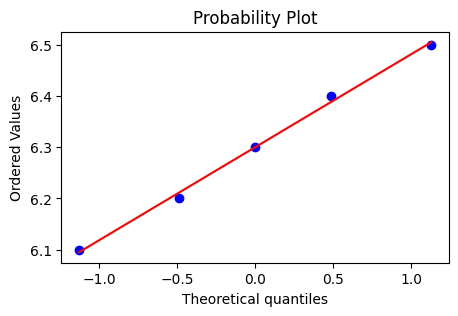

In [117]:
plt.figure(figsize=(5,3))
stats.probplot(data1, dist=stats.norm, plot=plt)
plt.show()

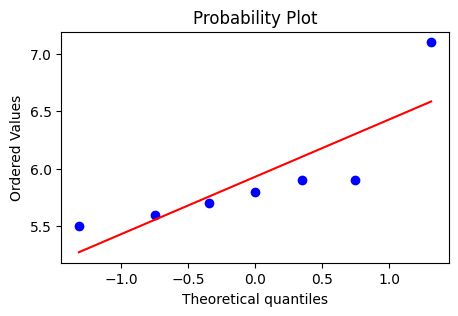

In [118]:
plt.figure(figsize=(5,3))
stats.probplot(data2, dist=stats.norm, plot=plt)
plt.show()

### 등분산 검정

In [119]:
print('귀무가설 : 두 데이터의 분산이 같다')
print('대립가설 : 두 데이터의 분산이 같지 않다')

statistic, p_value = stats.levene(data1, data2)
# statistic, p_value = stats.bartlett(data1, data2)
print("통계량:", statistic)
print("p-value:", p_value)

if p_value > 0.05:
    print('p 값이 0.05보다 크기 때문에 귀무 가설을 기각할 수 없다. 즉, 두 데이터 그룹은 분산이 다르다고 할 수 없다')
else:
    print('p 값이 0.05보다 작기 때문에 귀무 가설을 기각한다. 즉, 두 데이터 그룹은 분산은 같다고 할 수 없다')

귀무가설 : 두 데이터의 분산이 같다
대립가설 : 두 데이터의 분산이 같지 않다
통계량: 0.7572115384615388
p-value: 0.404606670016705
p 값이 0.05보다 크기 때문에 귀무 가설을 기각할 수 없다. 즉, 두 데이터 그룹은 분산이 다르다고 할 수 없다


## 정규성 따를 때 독립 2표본 T검정

In [122]:
print('귀무가설 : 두 데이터의 평균이 같다')
print('대립가설 : 두 데이터의 평균이 다르다')
print('data1 mean', np.mean(data1))
print('data2 mean', np.mean(data2))

# t통계량을 계산합니다.
t, pvalue = stats.ttest_ind(data1, data2, equal_var=True)
# t, pvalue = stats.ttest_ind(data1, data2, equal_var=False)

# 결과를 인쇄합니다.
print('t통계량:', t)
print('p값:', p_value)

if p_value > 0.05: print('p값이 0.05보다 크기 때문에 귀무가설 기각, 즉 두 데이터의 평균은 같다고 할 수 없음')
else: print('p값이 0.05보다 작기 때문에 귀무가설 기각 할 수 없음, 즉 두 데이터의 평균은 다르다고 할 수 없음')

귀무가설 : 두 데이터의 평균이 같다
대립가설 : 두 데이터의 평균이 다르다
data1 mean 6.3
data2 mean 5.928571428571429
t통계량: 1.481102841886769
p값: 0.404606670016705
p값이 0.05보다 크기 때문에 귀무가설 기각, 즉 두 데이터의 평균은 같다고 할 수 없음


## 윌콕슨의 순위합 검정 (정규성 안따를 때)

In [23]:
# 정규성 따르지 않을 때 (윌콕슨의 순위합 검정)
t, p_value = stats.ranksums(data1, data2)

# 결과를 인쇄합니다.
print('t통계량:', t)
print('p값:', p_value)

if p_value > 0.05: print('p값이 0.05보다 크기 때문에 귀무가설 기각, 즉 두 데이터의 평균은 같다고 할 수 없음')
else: print('p값이 0.05보다 작기 때문에 귀무가설 기각 할 수 없음, 즉 두 데이터의 평균은 다르다고 할 수 없음')

t통계량: 2.029994857352875
p값: 0.042357062026854894
p값이 0.05보다 작기 때문에 귀무가설 기각 할 수 없음, 즉 두 데이터의 평균은 다르다고 할 수 없음


## ttest_ind 함수 안쓰고 구하는 방법

In [58]:
import numpy as np

# 두 그룹의 데이터를 초기화합니다.
group1 = np.array([1, 2, 3, 4, 5])
group2 = np.array([6, 7, 8, 9, 10])

# 자유도를 계산합니다.
df = len(group1) + len(group2) - 2

# 그룹의 분산을 계산합니다.
s1_sq = np.var(group1)
s2_sq = np.var(group2)

# 분산의 분산을 계산합니다.
s_p_sq = (s1_sq + s2_sq) / df

# t-통계량을 계산합니다.
t_statistic = (group1.mean() - group2.mean()) / np.sqrt(s_p_sq * (1 / len(group1) + 1 / len(group2)))

# p-값을 계산합니다.
p_value = 2 * np.min(stats.t.cdf(t_statistic, df))

# 결과를 인쇄합니다.
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -11.180339887498949
p-value: 3.668914712980753e-06


## 대응 2표본 검정

In [40]:
import scipy.stats as stats

# 데이터를 정의합니다.
before = [10, 12, 14, 16, 18]
after = [12, 14, 16, 18, 25]

In [41]:
print('귀무가설 : 데이터가 정규성을 따른다')
print('대립가설 : 데이터가 정규성을 따르지 않는다')

# 샤피로-윌크 검정을 수행합니다.
if len(before) < 5000: statistic1, p_value1 = stats.shapiro(before)
else: statistic1, p_value1 = stats.anderson(before, dist='norm')

if len(after) < 5000: statistic2, p_value2 = stats.shapiro(after)
else: statistic2, p_value2 = stats.anderson(after, dist='norm')

# 결과를 인쇄합니다.
print("통계량:", statistic1, statistic2)
print("p-value:", p_value1, p_value2)

if p_value1 > 0.05: print('p 값이 0.05보다 크기 때문에 귀무 가설을 기각할 수 없다. 즉, 데이터는 정규성을 따른다고 할 수 있다.')
else: print('p값이 0.05보다 작기 때문에 귀무 가설을 기각한다. 즉, 데이터는 정규성을 따른다고 할 수 없다.')
if p_value2 > 0.05: print('p 값이 0.05보다 크기 때문에 귀무 가설을 기각할 수 없다. 즉, 데이터는 정규성을 따른다고 할 수 있다.')
else: print('p값이 0.05보다 작기 때문에 귀무 가설을 기각한다. 즉, 데이터는 정규성을 따른다고 할 수 없다.')

귀무가설 : 데이터가 정규성을 따른다
대립가설 : 데이터가 정규성을 따르지 않는다
통계량: 0.9867621660232544 0.9227042198181152
p-value: 0.9671739339828491 0.5475331544876099
p 값이 0.05보다 크기 때문에 귀무 가설을 기각할 수 없다. 즉, 데이터는 정규성을 따른다고 할 수 있다.
p 값이 0.05보다 크기 때문에 귀무 가설을 기각할 수 없다. 즉, 데이터는 정규성을 따른다고 할 수 있다.


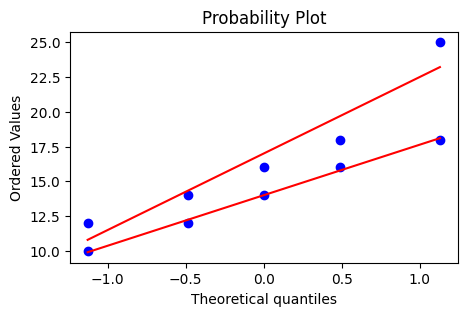

In [42]:
plt.figure(figsize=(5,3))
stats.probplot(before, dist=stats.norm, plot=plt)
stats.probplot(after, dist=stats.norm, plot=plt)
plt.show()

In [44]:
print('귀무가설 : 사전평균 사후평균이 같다')
print('대립가설 : 사전평균과 사후평균 다르다')

# 대응 2표본 t-검정을 수행합니다.
t_statistic, p_value = stats.ttest_rel(before, after)

# 결과를 인쇄합니다.
print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value > 0.05: print('p 값이 0.05보다 크기 때문에 귀무가설을 기각할 수 없다. 즉 사전평균과 사후평균이 다르다고 할 수 없음')
else: print('p 값이 0.05보다 작기 때문에 귀무가설을 기각. 즉 사전평균과 사후평균이 같다고 할 수 없음')

귀무가설 : 사전평균 사후평균이 같다
대립가설 : 사전평균과 사후평균 다르다
t-statistic: -3.0
p-value: 0.03994196807171883
p 값이 0.05보다 작기 때문에 귀무가설을 기각. 즉 사전평균과 사후평균이 같다고 할 수 없음


## 맨 휘트니 U 검정 (독립 2표본 검정, 비모수)
##### 맨-휘트니 U 검정은 독립 표본의 중앙값이 같은지 여부를 테스트하는 비모수 검정입니다. 이 검정은 표본의 크기가 작거나 정규 분포가 아닌 데이터에 적합합니다.
##### 맨-휘트니 U 검정은 귀무가설에 대해 관찰된 데이터보다 더 극단적인 데이터가 발생할 확률을 계산합니다.
##### 귀무가설이 참이면 이 확률은 매우 낮아야 합니다. 확률이 유의 수준 미만이면 귀무가설을 기각하고 두 모집단의 중앙값이 다르다고 결론을 내립니다.

In [108]:
from scipy.stats import mannwhitneyu

# 데이터 준비
data1 = [10, 15, 17, 19, 20]
data2 = [2, 3, 5, 7, 9]

# 맨-휘트니 U 검정 수행
p_value = mannwhitneyu(data1, data2)

# 결과 인쇄
print('p-value:', p_value)

p-value: MannwhitneyuResult(statistic=25.0, pvalue=0.007936507936507936)


## 적합도 검정

##### 적합도 검정은 표본의 관측된 도수분포가 특정 이론적 분포와 일치하는지 여부를 검정
##### 적합도 검정의 검정통계량은 카이제곱 통계량입니다. 카이제곱 통계량은 관측된 도수와 기대되는 도수의 차이의 제곱합입니다. 카이제곱 통계량이 임계값보다 크면 귀무가설을 기각합니다.
##### 적합도 검정은 다음과 같은 다양한 상황에서 사용할 수 있습니다.
##### 모집단의 분포가 특정 이론적 분포를 따르는지 여부를 검정합니다.
##### 두 모집단의 분포가 동일한지 여부를 검정합니다.
##### 세 개 이상의 모집단의 분포가 동일한지 여부를 검정합니다

In [99]:
import scipy.stats as stats

print('귀무가설 : 귀무가설은 표본의 관측된 도수분포가 이론적 분포와 일치')
print('대립가설 : 귀무가설은 표본의 관측된 도수분포가 이론적 분포와 일치 X')

# 관측 데이터
observed = [10, 20, 30, 40]
# 기대 데이터
expected = [25, 25, 25, 25]
# 카이제곱 검정
chi2, pvalue = stats.chisquare(observed, expected)
# 결과
print(chi2)
print(pvalue)
# p값이 0.1353319082969765보다 크므로 귀무가설을 기각할 수 없습니다. 즉, 관측 데이터와 기대 데이터 사이에는 유의미한 차이가 없습니다.

귀무가설 : 귀무가설은 표본의 관측된 도수분포가 이론적 분포와 일치
대립가설 : 귀무가설은 표본의 관측된 도수분포가 이론적 분포와 일치 X
20.0
0.00016974243555282632


## 독립성 검정

##### 독립성 검정은 두 변수가 관련되어 있는지 여부를 확인하는 통계적 방법입니다.
##### 두 변수는 범주형 또는 명목형일 수 있습니다. 검정은 두 변수가 독립적이라는 가정 하에 수행되며, 이는 두 변수가 서로 영향을 미치지 않는다는 것을 의미합니다.
##### 독립성 검정은 카이제곱 검정을 사용하여 수행됩니다. 카이제곱 통계량은 관측된 빈도와 기대 빈도 사이의 차이를 측정합니다. 카이제곱 통계량이 크면 두 변수가 독립적이지 않을 가능성이 높습니다.

In [57]:
import scipy.stats as stats

# 데이터를 정의합니다.
gender = ['male', 'female']
education = ['high school', 'college', 'graduate school']

# 빈도표를 만듭니다.
table = [[324, 78, 261], [371, 80, 212]]

# 카이제곱 검정을 수행합니다.
chi_square, p_value, dof, expected = stats.chi2_contingency(table)

# 결과를 인쇄합니다.
print("chi-square:", chi_square)
print("p-value:", p_value)
print("dof:", dof)
print("expected:", expected)

if p_value < 0.05: print('귀무가설을 기각합니다. 두 변수 사이에는 유의미한 관계가 있습니다.')
else: print('귀무가설을 기각할 수 없습니다. 두 변수 사이에는 유의미한 관계가 없습니다.')

chi-square: 8.279843658458306
p-value: 0.01592409625473879
dof: 2
expected: [[347.5  79.  236.5]
 [347.5  79.  236.5]]
귀무가설을 기각합니다. 두 변수 사이에는 유의미한 관계가 있습니다.


In [56]:
import pandas as pd
import numpy as np

print('귀무가설 : 두 변수는 독립')
print('귀무가설 : 두 변수는 독립이 아니다')

# 데이터 프레임 생성
df = pd.DataFrame({'성별': np.random.choice(['남성', '여성'], size=100),
                    '연령': np.random.randint(18, 60, size=100)})
# 독립성 검정 수행
from scipy.stats import chi2_contingency

chi2_result = chi2_contingency(pd.crosstab(df['성별'], df['연령']))

# 결과 출력
print('카이제곱 통계량: {}'.format(chi2_result[0]))
print('p값: {}'.format(chi2_result[1]))

# 해석
if chi2_result[1] < 0.05: print('귀무가설을 기각합니다. 두 변수 사이에는 유의미한 관계가 있습니다.')
else: print('귀무가설을 기각할 수 없습니다. 두 변수 사이에는 유의미한 관계가 없습니다.')

귀무가설 : 두 변수는 독립
귀무가설 : 두 변수는 독립이 아니다
카이제곱 통계량: 46.28327521484784
p값: 0.14090216150933615
귀무가설을 기각할 수 없습니다. 두 변수 사이에는 유의미한 관계가 없습니다.


## 비모수 독립성 검정
### 피셔의 정확검정
##### 피셔 정확검정은 두 범주형 변수 간의 관계를 테스트하는 비모수 검정입니다. 이 검정은 표본 크기가 작거나 기대 빈도가 5 미만인 셀이 있는 데이터에 적합합니다.
##### 피셔 정확검정은 귀무가설에 대해 관찰된 데이터보다 더 극단적인 데이터가 발생할 확률을 계산합니다. 귀무가설이 참이면 이 확률은 매우 낮아야 합니다.
##### 확률이 유의 수준 미만이면 귀무가설을 기각하고 두 변수 사이에 관계가 있다고 결론을 내립니다.

In [100]:
from scipy.stats import fisher_exact

# 데이터 준비
data = [[10, 15], [20, 25]]

# 피셔 정확검정 수행
p_value = fisher_exact(data)

# 결과 인쇄
print('p-value:', p_value)

p-value: (0.8333333333333334, 0.8036278345523921)


## 맥니머 검정 (대응 표본)
##### 맥니머 검정은 2x2 분할표에서 두 범주형 변수 간의 차이를 테스트하는 비모수 검정입니다. 이 검정은 표본 크기가 작거나 기대 빈도가 5 미만인 셀이 있는 데이터에 적합합니다.
##### 맥니머 검정은 귀무가설에 대해 관찰된 데이터보다 더 극단적인 데이터가 발생할 확률을 계산합니다. 귀무가설이 참이면 이 확률은 매우 낮아야 합니다.
##### 확률이 유의 수준 미만이면 귀무가설을 기각하고 두 변수 사이에 차이가 있다고 결론을 내립니다.

In [102]:
from statsmodels.stats.contingency_tables import mcnemar

# 데이터 준비
data = [[10, 15], [20, 25]]

# 맥니머 검정 수행
p_value = mcnemar(data)

# 결과 인쇄
print('p-value:', p_value)

p-value: pvalue      0.4995598332025112
statistic   15.0


## 코크란Q검정 (대응 표본 3개 이상)
##### 코크란 Q 검정은 세 개 이상의 범주형 변수 간의 차이를 테스트하는 비모수 검정입니다. 이 검정은 표본 크기가 작거나 기대 빈도가 5 미만인 셀이 있는 데이터에 적합합니다.
##### 코크란 Q 검정은 귀무가설에 대해 관찰된 데이터보다 더 극단적인 데이터가 발생할 확률을 계산합니다.
##### 귀무가설이 참이면 이 확률은 매우 낮아야 합니다. 확률이 유의 수준 미만이면 귀무가설을 기각하고 세 변수 사이에 차이가 있다고 결론을 내립니다.

In [107]:
from statsmodels.stats.contingency_tables import cochrans_q

# 데이터 준비
data = [[10, 15], [20, 25], [30, 35]]

# 코크란 Q 검정 수행
p_value = cochrans_q(data)

# 결과 인쇄
print('p-value:', p_value)

p-value: df          1
pvalue      0.31731050786291115
statistic   1.0


## 일원배치 분산 분석(ANOVA)
##### 여러 모집단의 평균이 모두 같은지 여부를 테스트하는 데 사용되는 통계적 방법입니다.
##### 예를 들어, 세 가지 다른 약물의 효과를 테스트하고 각 약물의 효능이 동일한지 확인하려는 경우 일원 분산 분석을 사용할 수 있습니다.

In [127]:
import numpy as np
import scipy.stats as stats

# 데이터를 정의합니다.
data1 = [6.1, 6.2, 6.3, 6.4, 6.5]
data2 = [5.9, 5.8, 5.7, 5.6, 5.5]
data3 = [6.0, 6.1, 6.2, 6.3, 6.4]

print('귀무가설 : 세 그룹의 평균이 같다')
print('대립가설 : 세 그룹의 평균이 다르다')

# F통계량과 p값을 계산합니다.
f, pvalue = stats.f_oneway(data1, data2, data3)

# 결과를 인쇄합니다.
print('F통계량:', f)
print('p값:', pvalue)

if pvalue > 0.05: print('귀무가설 기각 할 수 없음. 즉 세 그룹의 평균이 다르다고 할 수 없음')
else: print('귀무가설 기각. 즉 세 그룹의 평균이 같다고 할 수 없음')

귀무가설 : 세 그룹의 평균이 같다
대립가설 : 세 그룹의 평균이 다르다
F통계량: 20.666666666666636
p값: 0.00012974633789062588
귀무가설 기각. 즉 세 그룹의 평균이 같다고 할 수 없음


## 이원배치 분산분석
##### 이원 배치 분산 분석(ANOVA)은 두 개 이상의 집단 간에 평균의 차이가 있는지 여부를 테스트하는 통계적 방법입니다.
##### 이원 배치 ANOVA는 두 개 이상의 집단과 두 개 이상의 요인을 갖는 데이터를 분석하는 데 사용할 수 있습니다. 이원 배치 ANOVA는 다음과 같은 경우에 사용됩니다.

In [138]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data = pd.DataFrame(data, columns=['head_size','fetus','observer'])
formula = 'head_size ~ C(fetus)+C(observer)+C(fetus):C(observer)'
lm = ols(formula, data).fit()
print(anova_lm(lm))

## 반복없는 이원배치 분산분석
##### 반복 없는 이원배치 분산분석은 두 개의 독립변수에 대한 데이터가 각각 반복 없이 각 집단에 할당되는 것을 기반으로 합니다.
##### F = (SSB / DF_B) / (SSE / DF_E)
##### SSB는 요인 A의 분산 / DF_B는 요인 A의 자유도  / SSE는 오차의 분산  / DF_E는 오차의 자유도

## 반복있는 이원배치 분산분석
##### 반면 반복 있는 이원배치 분산분석은 두 개의 독립변수에 대한 데이터가 각 집단에 반복적으로 할당되며, 이는 데이터가 두 집단에 모두 할당될 수 있음을 의미합니다.
##### F = (SSB / DF_B) / (SSA / DF_A + SSE / DF_E)
##### SSB는 요인 A의 분산 / DF_B는 요인 A의 자유도 / SSE는 오차의 분산 / DF_E는 오차의 자유도

###### ■ 제5장 머신러닝 프로세스
###### 제1절 머신러닝의 의미
###### 제2절 머신러닝 분석 프로세스 설명
###### 제3절 성능평가 기법
###### 제4절 머신러닝 분석 과정 빠르게 맛보기 - 회귀분석
###### 제5절 머신러닝 분석 과정 빠르게 맛보기 - 분류분석

###### ■ 제6장 머신러닝 - 지도학습
###### 제1절 단순 선형 회귀(Simple Linear Regression Model)
###### 제2절 다항 회귀(Polynomial Regression)
###### 제3절 다중 회귀(Multiple Regression)
###### 제4절 로지스틱 회귀(Logistic Regression)
###### 제5절 서포트 벡터 머신(Support Vector Machine)
###### 제6절 K-최근접 이웃(KNN)
###### 제7절 의사결정나무(Decision Tree)
###### 제8절 앙상블(Ensemble)
###### 제9절 나이브베이즈(Naive Bayes) 분류

###### ■ 제7장 통계분석
###### 제1절 통계분석 프로세스
###### 제2절 t-test
###### 제3절 분산분석(ANOVA)
###### 제4절 교차분석(카이제곱 검정)
###### 제5절 선형 회귀분석
###### 제6절 군집분석
###### 제7절 연관분석
###### 제8절 시계열분석